In [1]:
import gym
from dqn_and_ddqn import agent

import tensorflow as tf
import time
import matplotlib.pyplot as plt
from statistics import mean 

#Training on 4 environments
`environment_list = ["CartPole-v0","CartPole-v1","Acrobot-v1","MountainCar-v0"]
agent_names = ["dqn","ddqn"]
for env in environment_list:
    environment = gym.make(env)
    player = agent.Gameagent(environment=environment)
    for game_agent in agent_names:
        if(game_agent == "dqn"):
            train_steps,train_losses,train_rewards = player.train_dqn()
        else:
            train_steps,train_losses,train_rewards = player.train_ddqn()
        player.save_training_variable(game_agent,train_steps,train_losses,train_rewards)
        player.save_weights(game_agent)`

Visualization for dqn agent in CartPole-v0 environment:
Visualization for ddqn agent in CartPole-v0 environment:
Visualization for dqn agent in CartPole-v1 environment:
Visualization for ddqn agent in CartPole-v1 environment:
Visualization for dqn agent in Acrobot-v1 environment:
Visualization for ddqn agent in Acrobot-v1 environment:
Visualization for dqn agent in MountainCar-v0 environment:
Visualization for ddqn agent in MountainCar-v0 environment:


C:\Users\Saurabh\Anaconda3\envs\ANN\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


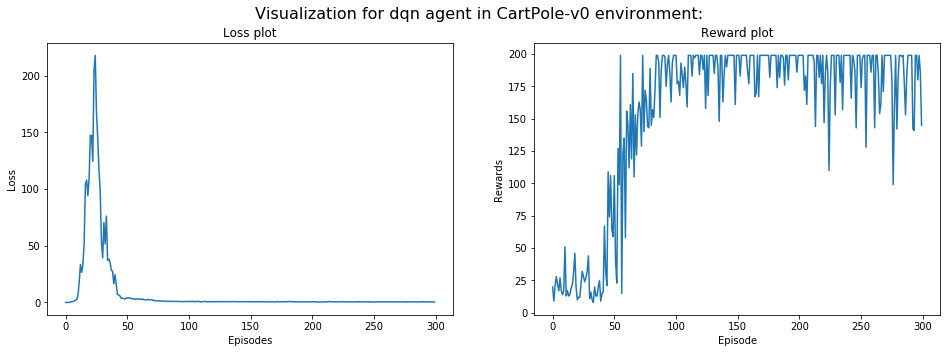

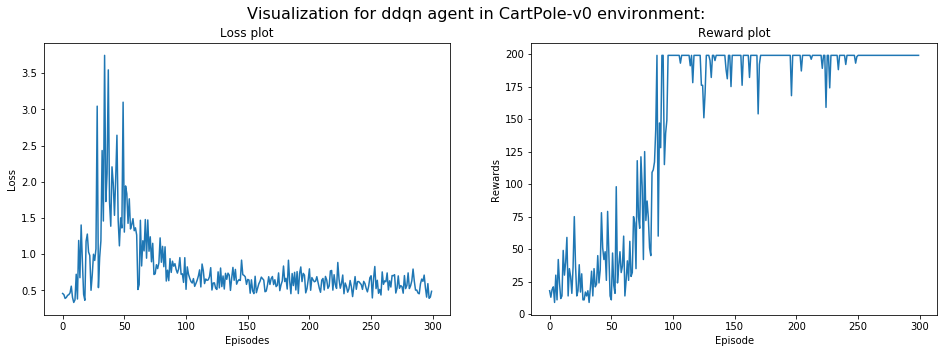

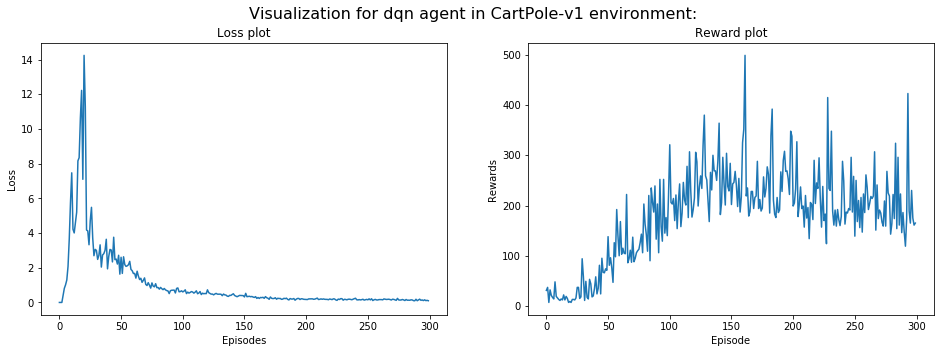

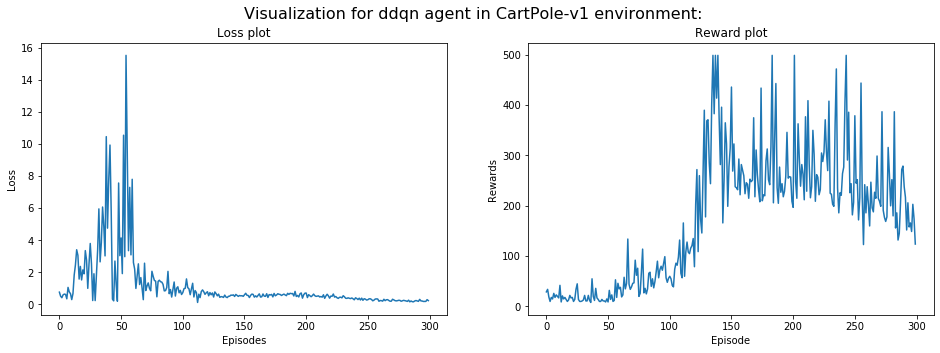

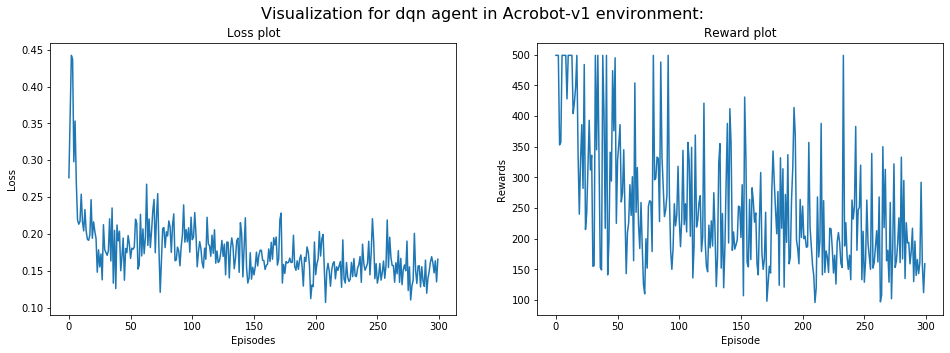

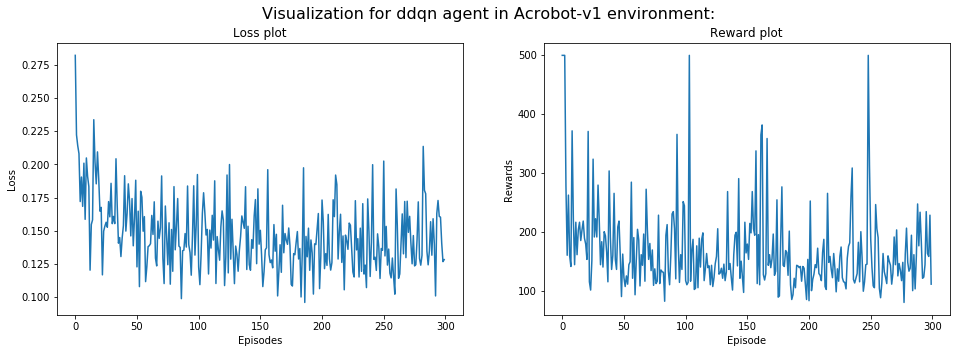

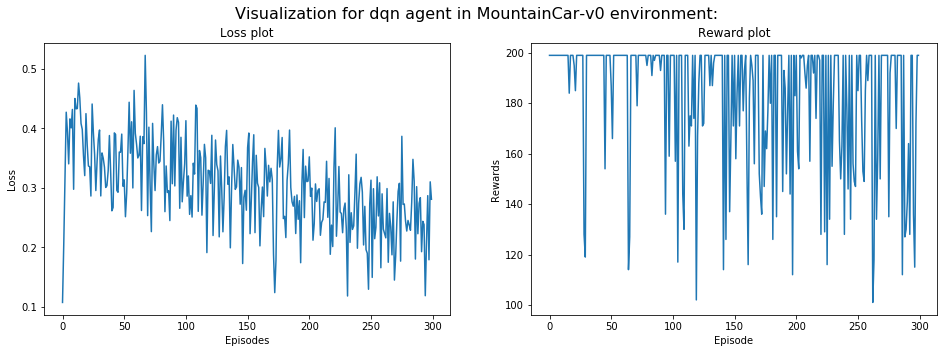

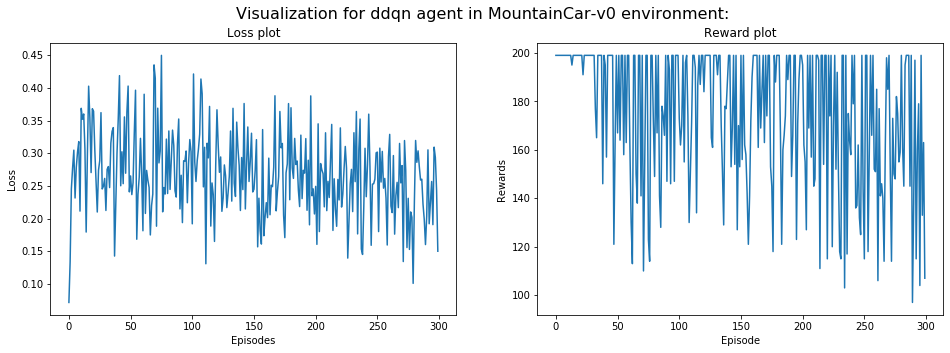

In [2]:
# load and visualize the result for all env
environment_list = ["CartPole-v0","CartPole-v1","Acrobot-v1","MountainCar-v0"]
agent_names = ["dqn","ddqn"]
figs = []
for env_name in environment_list:
    environment = gym.make(env_name)
    for agent_name in agent_names:
        player = agent.Gameagent(environment=environment)
        
        # Loading weight must run once the model as suggested here
        # https://www.tensorflow.org/guide/keras/save_and_serialize
        with tf.device('/device:CPU:0'):
            player.load_weights(agent_name)
        figs.append(player.visualise(*player.load_training_variable(agent_name)))
figs.reverse()
for env_name in environment_list:
    for agent_name in agent_names:
        print(f"Visualization for {agent_name} agent in {env_name} environment:")
        figs.pop().show()

In [3]:
def visualise(x,y,agent_name,environment):
    fig = plt.figure(figsize=(16,5))
    plt.plot(x,y)
    plt.xlabel("Steps")
    plt.ylabel("Rewards")
    plt.title(f'Test Visualization for {agent_name} agent in {env_name} environment:', fontsize=16)
    return fig

Can't save video in file
Testing rewards 200: 


 Testing Statistics for dqn agent in CartPole-v0 environment: minimum rewards = 200, maximum reward = 200, average reward = 200 
Visualization for dqn agent in CartPole-v0 environment:
 Testing Statistics for ddqn agent in CartPole-v0 environment: minimum rewards = 153, maximum reward = 200, average reward = 196.76 
Visualization for ddqn agent in CartPole-v0 environment:
 Testing Statistics for dqn agent in CartPole-v1 environment: minimum rewards = 131, maximum reward = 339, average reward = 184.44 
Visualization for dqn agent in CartPole-v1 environment:
 Testing Statistics for ddqn agent in CartPole-v1 environment: minimum rewards = 113, maximum reward = 165, average reward = 130.28 
Visualization for ddqn agent in CartPole-v1 environment:
 Testing Statistics for dqn agent in Acrobot-v1 environment: minimum rewards = 70, maximum reward = 276, average reward = 103.74 
Visualization for dqn agent in Acrobot-v1 environment:
 Testing Statistics for ddqn agent in Acrobot-v1 environment: 

C:\Users\Saurabh\Anaconda3\envs\ANN\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


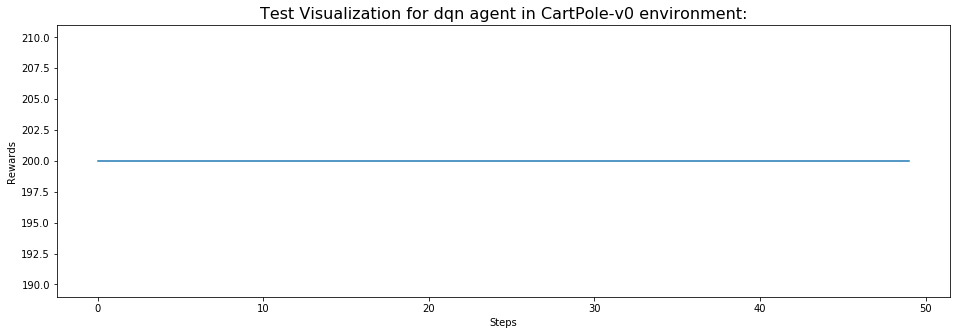

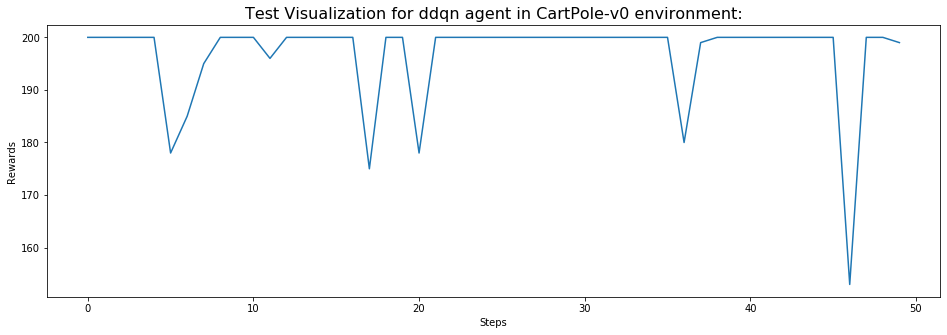

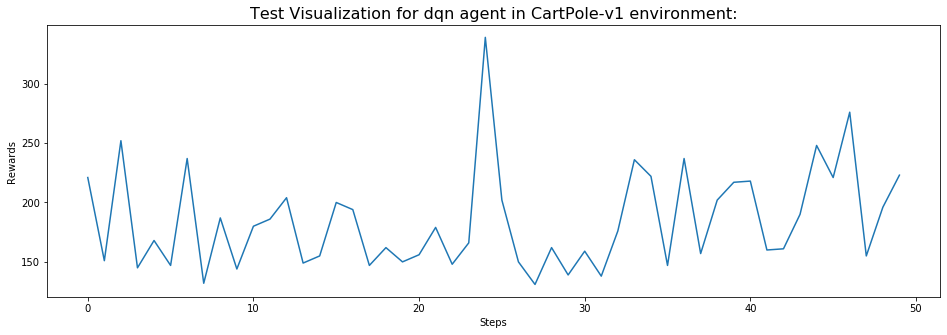

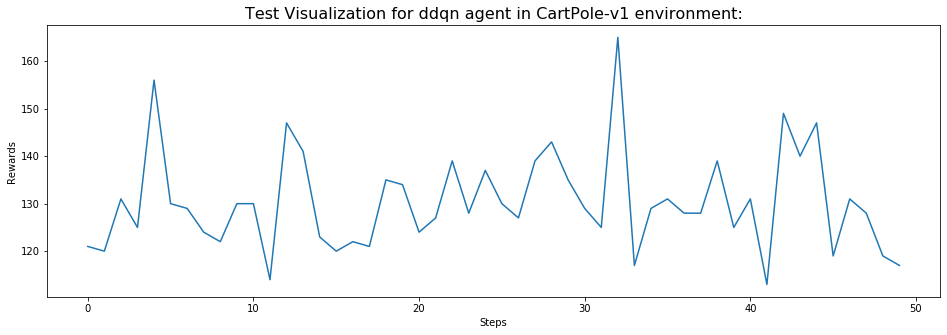

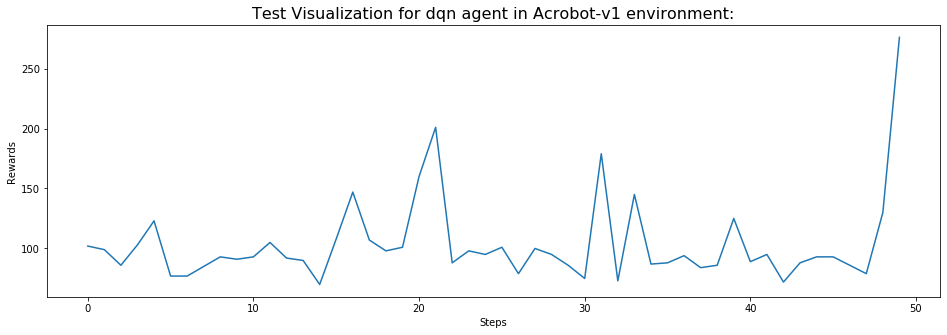

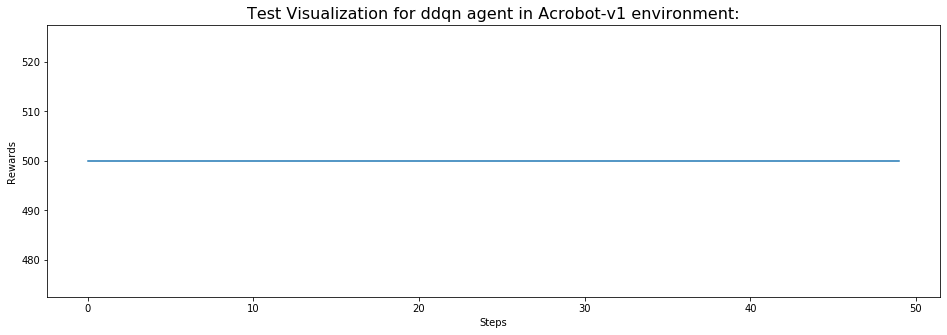

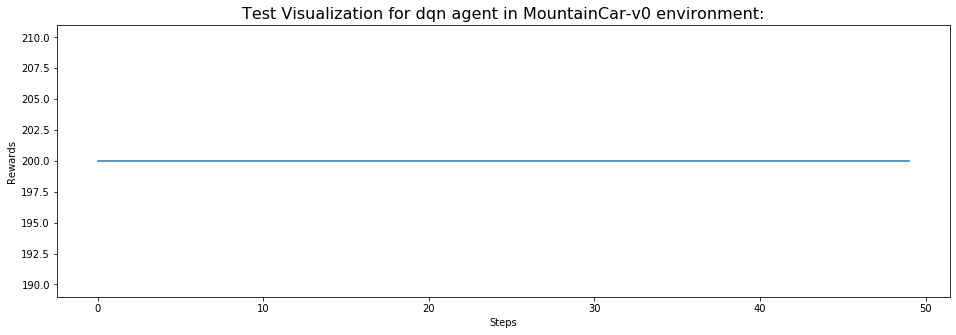

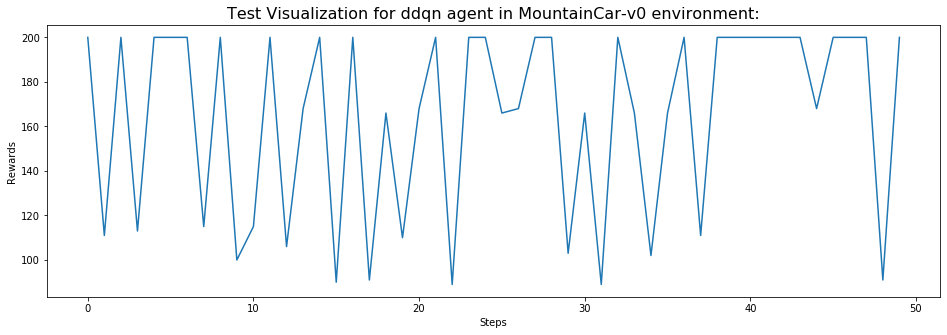

In [4]:
# load weights, test and visualize the result for all env
## Install package ffmpeg from conda to run the testing
no_of_steps = 50
environment_list = ["CartPole-v0","CartPole-v1","Acrobot-v1","MountainCar-v0"]
agent_names = ["dqn","ddqn"]
figs = []
minimum_reward =[]
maximum_reward =[]
average_reward =[]
for env_name in environment_list:
    environment = gym.make(env_name)
    for agent_name in agent_names:
        player = agent.Gameagent(environment=environment)
        test_steps=[]
        test_rewards=[]
        for step in range(no_of_steps):
            # Loading weight must run once the model as suggested here
            # https://www.tensorflow.org/guide/keras/save_and_serialize
            with tf.device('/device:CPU:0'):
                player.load_weights(agent_name)
            reward = player.test(agent_name)
            test_steps.append(step)
            test_rewards.append(reward)
        minimum_reward.append(min(test_rewards))
        maximum_reward.append(max(test_rewards))
        average_reward.append(mean(test_rewards))
        figs.append(visualise(test_steps,test_rewards,agent_name,environment))
figs.reverse()
minimum_reward.reverse()
average_reward.reverse()
maximum_reward.reverse()
for env_name in environment_list:
    for agent_name in agent_names:
        print(f" Testing Statistics for {agent_name} agent in {env_name} environment: minimum rewards = {minimum_reward.pop()}, maximum reward = {maximum_reward.pop()}, average reward = {average_reward.pop()} ")
        print(f"Visualization for {agent_name} agent in {env_name} environment:")
        figs.pop().show()